<a href="https://colab.research.google.com/github/AparnaRameshA95/Assigmnents/blob/main/Aparna_Ramesh_A_Assignment_on_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [109]:
# Load the dataset
df = pd.read_csv('/content/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
# Set 'PassengerId' as the index column
df.set_index('PassengerId', inplace=True)

In [111]:
# Display modified dataset
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
# Basic details of data set
df.shape

(891, 11)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [114]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
# Checking the missing values
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [116]:
# In Age, filling with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# In Embarked, filling with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# In Cabin, filling with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


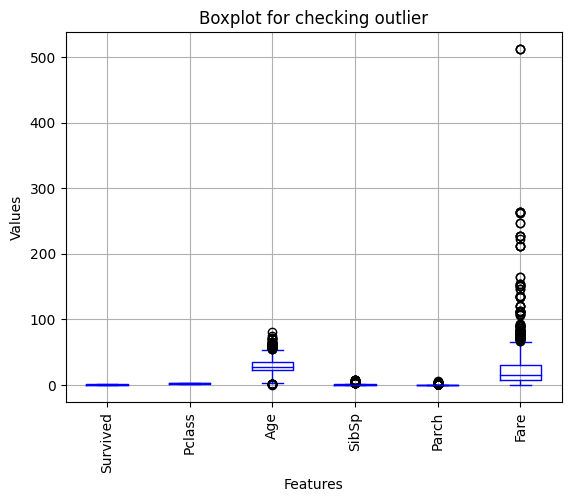

In [117]:
# Outlier checking using boxplot
df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

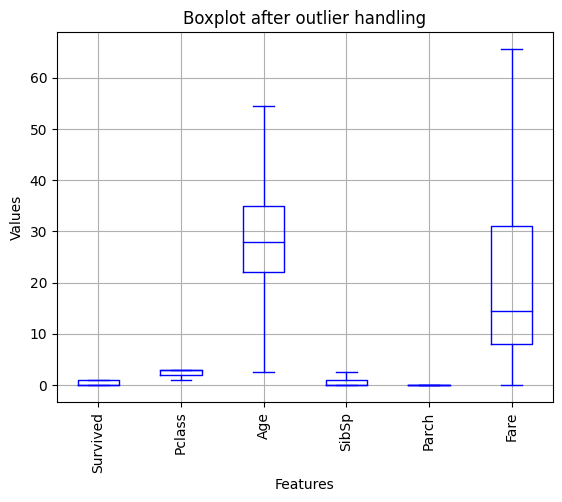

In [118]:
# Select features
features = ['Age', 'Fare', 'SibSp', 'Parch']
# Detecting outliers using IQR
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
outliers_lower = df[features]<(Q1-1.5*IQR)
outliers_upper = df[features]>(Q3 + 1.5*IQR)
# Apply capping on the selected features
for feature in features:
    df[feature] = df[feature].clip(lower=Q1[feature] - 1.5 * IQR[feature], upper=Q3[feature] + 1.5 * IQR[feature])
df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot after outlier handling')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [119]:
# Features and target
features = df.drop(columns=['Survived'])
target = df['Survived']

# Select only numerical columns for scaling
numerical_features = features.select_dtypes(include=['number'])
categorical_features = features.select_dtypes(exclude=['number'])

# Apply Min-Max Scaling to numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(numerical_features)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features.columns, index=features.index)

# Concatenate the scaled numerical features with the categorical features
X = pd.concat([categorical_features,X_scaled_df], axis=1)
X.head()

# Add the target
scaled_df = pd.concat([X, target], axis=1)

In [120]:
scaled_df.head()

,Name,Sex,Ticket,Cabin,Embarked,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S,1.0,0.375000,0.4,0.0,0.110460,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,0.0,0.682692,0.4,0.0,1.000000,1
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S,1.0,0.451923,0.0,0.0,0.120745,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,0.0,0.625000,0.4,0.0,0.809027,1
5,"Allen, Mr. William Henry",male,373450,Unknown,S,1.0,0.625000,0.0,0.0,0.122649,0
